In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0) # 显示大小

In [2]:
def hand_col(df,col ="发动机转速",n=240):
    
    ####计算col停顿时间
    df["last_notna_time"] = df[df[col].notna()].Time   ##当时不是na的时间
    df_notna_time = df[df[col].notna()].Time
    df_notna_time_diff = (df_notna_time - df_notna_time.shift(1)).dt.total_seconds()
    df["last_notna_time_diff"] = df_notna_time_diff
    df["last_notna_time_diff"] = df["last_notna_time_diff"].fillna(method = "bfill")
    
    df.loc[df["last_notna_time_diff"]> n,col] = df.loc[df["last_notna_time_diff"]> n,col].fillna(0)  #长时间na的填充0
    df[col] = df[col].fillna(method = "ffill")
    return df

In [3]:
def cz(df,idx,col="累计油耗"):
    num = len(idx)
    for i in range(num-1):
        start = idx.iloc[i]
        end = idx.iloc[i+1]
        cz_num = end-start
        start_num = df.loc[start,col]
        end_num = df.loc[end,col]
        fillna = np.linspace(start_num,end_num,cz_num+1)
        df.loc[start:end,col] = fillna
    return df

In [4]:
def hand_col_cz(df,col ="累计油耗"):   ###插值处理
    
    ####计算col停顿间隔
    df["last_notna_idx"] = df[df[col].notna()].idx   ##当时不是na的idx
    df_notna_idx = df[df[col].notna()].idx
    df_notna_idx_diff = (df_notna_idx - df_notna_idx.shift(1))
    df["last_notna_idx_diff"] = df_notna_idx_diff
    df["last_notna_idx_diff"] = df["last_notna_idx_diff"].fillna(method = "bfill")
    
    df.loc[df["last_notna_time_diff"]> n,col] = df.loc[df["last_notna_time_diff"]> n,col].fillna(0)  #长时间na的填充0
    df[col] = df[col].fillna(method = "ffill")
    return df

In [5]:
def hand(df):
    df = df.drop(["GPS纬度","GPS经度","GPS定位时间"],axis=1)#去除无用数据
    df["Time"] = pd.to_datetime(df["time"].str[:-3])#时间转化,直接去掉小数部分
    
    ####停机以发动机数据为准,处理缺失发动机转数
    df = hand_col(df,col ="发动机转速",n=240)
    
    df = hand_col(df,col ="系统压力",n=240)
    
    df = hand_col(df,col ="转向次数",n=240)
    
    df = hand_col(df,col ="泵送排量",n=240)
    
    df = hand_col(df,col ="泵车状态",n=120)
    
    ####油耗单独填充,插值
    df_notna_idx = df[df["累计油耗"].notna()].idx
    df = cz(df,df_notna_idx,col="累计油耗")
    ###
    
    
    ####泵送计时填充
    df["累计时间"] = df["累计时间"].fillna(method = "ffill")
    
    
    
    ####液压油温用插值
    df_notna_idx = df[df["液压油温"].notna()].idx
    df = cz(df,df_notna_idx,col="液压油温")
    return df
    
    
  

In [46]:
df = pd.read_csv("data.csv",skiprows=1)
df["Time"] = pd.to_datetime(df["time"].str[:-3])#时间转化,直接去掉小数部分
df["idx"] = np.arange(len(df))

In [7]:
df = hand(df)

In [8]:
df = df.dropna()

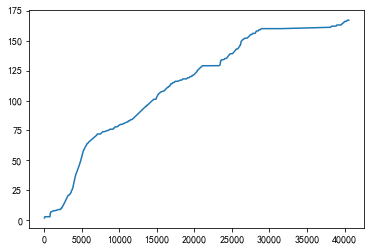

In [38]:
df["累计油耗"].plot()

In [39]:
df

,time,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,Time,idx,last_notna_time,last_notna_time_diff
2,2019-07-28 01:31:59.80,50.0,0.0,2.000000,0.0,560.0,0.0,0.00,0.0,2019-07-28 01:31:59,2,2019-07-28 01:31:59,2.0
5,2019-07-28 01:32:01.54,50.0,0.0,2.050000,0.0,558.0,0.0,0.00,0.0,2019-07-28 01:32:01,5,2019-07-28 01:32:01,2.0
6,2019-07-28 01:32:02.52,50.0,0.0,2.066667,0.0,559.0,0.0,0.00,0.0,2019-07-28 01:32:02,6,2019-07-28 01:32:02,1.0
7,2019-07-28 01:32:03.52,50.0,0.0,2.083333,0.0,559.0,0.0,0.00,0.0,2019-07-28 01:32:03,7,2019-07-28 01:32:03,1.0
8,2019-07-28 01:32:04.54,50.0,0.0,2.100000,0.0,558.0,0.0,0.00,0.0,2019-07-28 01:32:04,8,2019-07-28 01:32:04,1.0
9,2019-07-28 01:32:05.53,50.0,0.0,2.116667,0.0,558.0,0.0,0.00,0.0,2019-07-28 01:32:05,9,2019-07-28 01:32:05,1.0
10,2019-07-28 01:32:06.56,50.0,0.0,2.133333,0.0,555.0,0.0,0.00,0.0,2019-07-28 01:32:06,10,2019-07-28 01:32:06,1.0
11,2019-07-28 01:32:07.60,50.0,0.0,2.150000,0.0,545.0,0.0,0.00,0.0,2019-07-28 01:32:07,11,2019-07-28 01:32:07,1.0
12,2019-07-28 01:32:08.60,50.0,0.0,2.166667,0.0,537.0,0.0,0.00,0.0,2019-07-28 01:32:08,12,2019-07-28 01:32:08,1.0
13,2019-07-28 01:32:09.64,50.0,0.0,2.183333,0.0,559.0,0.0,0.00,0.0,2019-07-28 01:32:09,13,2019-07-28 01:32:09,1.0


# 生成时间序列

In [10]:
df["second"] = df.Time.apply(lambda x: time.mktime(x.timetuple()))
second_start = df.iloc[0].second
df["five_second"] = (df.second - second_start)  // 5

In [11]:
df

,time,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,Time,idx,last_notna_time,last_notna_time_diff,second,five_second
0,2019-07-28 01:31:56.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-28 01:31:56,0,NaT,2.0,1.564249e+09,0.0
1,2019-07-28 01:31:57.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-28 01:31:57,1,NaT,2.0,1.564249e+09,0.0
2,2019-07-28 01:31:59.80,50.0,0.0,2.000000,0.0,560.0,0.0,0.00,0.0,2019-07-28 01:31:59,2,2019-07-28 01:31:59,2.0,1.564249e+09,0.0
3,2019-07-28 01:31:59.86,50.0,0.0,2.016667,0.0,560.0,0.0,0.00,0.0,2019-07-28 01:31:59,3,NaT,2.0,1.564249e+09,0.0
4,2019-07-28 01:32:00.42,50.0,0.0,2.033333,0.0,560.0,0.0,0.00,0.0,2019-07-28 01:32:00,4,NaT,2.0,1.564249e+09,0.0
5,2019-07-28 01:32:01.54,50.0,0.0,2.050000,0.0,558.0,0.0,0.00,0.0,2019-07-28 01:32:01,5,2019-07-28 01:32:01,2.0,1.564249e+09,1.0
6,2019-07-28 01:32:02.52,50.0,0.0,2.066667,0.0,559.0,0.0,0.00,0.0,2019-07-28 01:32:02,6,2019-07-28 01:32:02,1.0,1.564249e+09,1.0
7,2019-07-28 01:32:03.52,50.0,0.0,2.083333,0.0,559.0,0.0,0.00,0.0,2019-07-28 01:32:03,7,2019-07-28 01:32:03,1.0,1.564249e+09,1.0
8,2019-07-28 01:32:04.54,50.0,0.0,2.100000,0.0,558.0,0.0,0.00,0.0,2019-07-28 01:32:04,8,2019-07-28 01:32:04,1.0,1.564249e+09,1.0
9,2019-07-28 01:32:05.53,50.0,0.0,2.116667,0.0,558.0,0.0,0.00,0.0,2019-07-28 01:32:05,9,2019-07-28 01:32:05,1.0,1.564249e+09,1.0


In [12]:
df_mean = df.drop("time",axis=1).groupby("five_second").mean()

In [38]:
####泵车状态不能用均值，可能得出无意义的值，取最大值表示

In [14]:
df_mean["泵车状态"] = df[["泵车状态","five_second"]].groupby("five_second").max()

In [16]:
df_mean["泵车状态"].unique()

array([ 0., 14., 12.,  3.,  4.,  5.,  1.,  7.,  6.,  9., 11.,  2.])

In [15]:
df_mean

,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,idx,last_notna_time_diff,second
five_second,,,,,,,,,,,
0.0,50.0,0.0,2.016667,0.0,560.000000,0.0,0.00,0.0,2.000000,2.000000,1.564249e+09
1.0,50.0,0.0,2.083333,0.0,558.400000,0.0,0.00,0.0,7.000000,1.200000,1.564249e+09
2.0,50.0,0.0,2.166667,0.0,551.800000,0.0,0.00,0.0,12.000000,1.000000,1.564249e+09
3.0,50.0,0.0,2.250000,0.0,561.000000,0.0,0.00,0.0,17.000000,1.800000,1.564249e+09
4.0,50.0,0.0,2.333333,0.0,565.800000,0.0,0.00,0.0,22.000000,1.000000,1.564249e+09
5.0,50.0,0.0,2.408333,0.0,567.250000,0.0,0.00,0.0,26.500000,1.000000,1.564249e+09
6.0,50.0,0.0,2.491667,0.0,558.333333,0.0,0.00,0.0,31.500000,1.000000,1.564249e+09
7.0,50.0,0.0,2.575000,0.0,560.000000,0.0,0.00,0.0,36.500000,1.250000,1.564249e+09
8.0,50.0,0.0,2.650000,0.0,555.200000,0.0,0.00,0.0,41.000000,1.400000,1.564249e+09


In [17]:
start = df.iloc[0].second
end = df.iloc[-1].second
second_index = np.arange(start,end,5)

In [18]:
second_idx = pd.DataFrame({"second_idx":second_index})

In [19]:
len(second_idx)

49429

In [35]:
len(second_idx)/12/60/24  ###数据持续时间 天  2~3天正常

2.860474537037037

In [20]:
new_df = second_idx.join(df_mean)

In [65]:
new_df = new_df.drop(["idx","last_notna_time_diff","second"],axis=1)

In [64]:
new_df["time"] = pd.to_datetime(new_df['second_idx'].values, unit='s',utc=True).tz_convert("Asia/Shanghai").tz_localize(None)

In [37]:
len(new_df[new_df["发动机转速"]>0])/12/60   ###发动机累积工作时间  5~6小时正常，太短则可能遇到数据传输缺失的问题

6.752777777777778

In [21]:
new_df["发动机转速"] = new_df["发动机转速"].fillna(0)

In [22]:
new_df["累计油耗"] = new_df["累计油耗"].fillna(method = "bfill")

In [23]:
new_df["系统压力"] = new_df["系统压力"].fillna(0)

In [24]:
new_df["转向次数"] = new_df["转向次数"].fillna(0)

In [25]:
new_df["泵送排量"] = new_df["泵送排量"].fillna(0)

In [26]:
new_df["泵车状态"] = new_df["泵车状态"].fillna(0)   ####不工作状态

In [27]:
new_df["累计时间"] = new_df["累计时间"].fillna(method = "bfill")

In [24]:
####液压油温继续插值补缺

In [28]:
new_df = new_df.reset_index()

In [29]:
df_notna_idx = new_df[new_df["液压油温"].notna()]["index"]

In [30]:
new_df = cz(new_df,df_notna_idx,col="液压油温")

In [31]:
new_df["液压油温"].describe([0.05,0.1])

count    45508.000000
mean        55.924771
std         13.546327
min         38.000000
5%          39.512465
10%         39.577964
50%         57.449530
max         85.000000
Name: 液压油温, dtype: float64

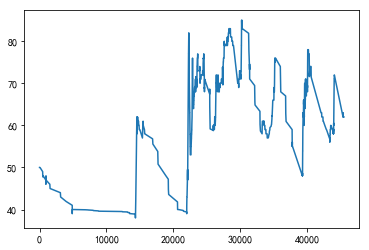

In [32]:
new_df["液压油温"].plot()

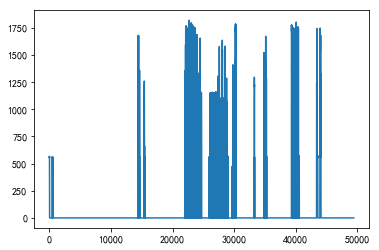

In [33]:
new_df["发动机转速"].plot()

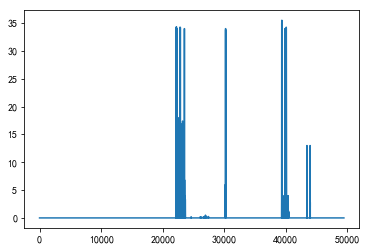

In [39]:
new_df["系统压力"].plot()

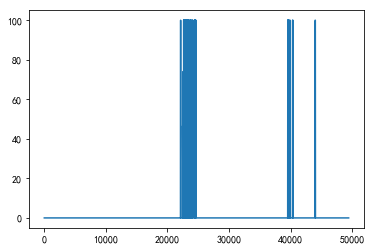

In [41]:
new_df["泵送排量"].plot()

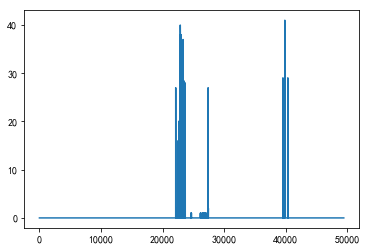

In [94]:
new_df["转向次数"].plot()

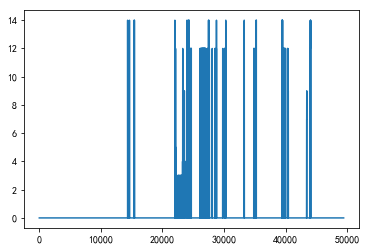

In [40]:
new_df["泵车状态"].plot()

# 过程划分

In [ ]:
##

In [88]:
def count_cut(df,col,t): ######间隔t个行视为分割开的次数
    df.loc[df[col]>0,"col_diff"] = df.loc[df[col]>0,"index"] - df.loc[df[col]>0,"index"].shift(1)
    df.loc[df[col]>0,"count_flag"] =df.loc[df[col]>0,"col_diff"].apply(lambda x: 1 if x>t else 0)
    df.loc[df[col]>0,col+"count"] =df.loc[df[col]>0,"count_flag"].cumsum()
    df = df.drop(["col_diff","count_flag"],axis=1)
    return df

In [97]:
new_df = count_cut(new_df,"转向次数",360)

In [103]:
new_df[new_df["转向次数count"]==1]

,index,second_idx,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,time,count,转向次数count
24600,24600,1.564372e+09,74.133333,0.0,80.242122,0.366667,1149.200000,0.00000,1.371000,12.0,2019-07-29 11:41:56,NaN,1.0
24607,24607,1.564372e+09,74.000000,0.0,80.273312,0.600000,1149.200000,0.00000,1.370000,12.0,2019-07-29 11:42:31,NaN,1.0
24608,24608,1.564372e+09,74.000000,0.0,80.303537,1.000000,1150.200000,0.00000,1.370000,12.0,2019-07-29 11:42:36,NaN,1.0
24609,24609,1.564372e+09,73.600000,0.0,80.331833,1.000000,1149.800000,0.00000,1.376000,12.0,2019-07-29 11:42:41,NaN,1.0
24612,24612,1.564372e+09,72.707317,0.0,80.479257,1.000000,1149.731707,0.02439,1.383902,12.0,2019-07-29 11:42:56,NaN,1.0
24614,24614,1.564372e+09,73.000000,0.0,80.352090,1.000000,1152.000000,0.00000,1.380000,12.0,2019-07-29 11:43:06,NaN,1.0
24615,24615,1.564372e+09,73.000000,0.0,80.372990,1.000000,1146.200000,0.00000,1.380000,12.0,2019-07-29 11:43:11,NaN,1.0
24616,24616,1.564372e+09,73.000000,0.0,80.405145,1.000000,1150.800000,0.00000,1.380000,12.0,2019-07-29 11:43:16,NaN,1.0
24617,24617,1.564372e+09,73.000000,0.0,80.437299,1.000000,1150.400000,0.00000,1.380000,12.0,2019-07-29 11:43:21,NaN,1.0
24618,24618,1.564372e+09,73.000000,0.0,80.469453,1.000000,1150.200000,0.00000,1.380000,12.0,2019-07-29 11:43:26,NaN,1.0


In [79]:
new_df.loc[new_df["泵送排量"]>0,"col_diff"] = new_df.loc[new_df["泵送排量"]>0,"index"] - new_df.loc[new_df["泵送排量"]>0,"index"].shift(1)

In [83]:
new_df.loc[new_df["泵送排量"]>0,"count_flag"] =new_df.loc[new_df["泵送排量"]>0,"col_diff"].apply(lambda x: 1 if x>100 else 0)

In [85]:
new_df.loc[new_df["泵送排量"]>0,"count"] =new_df.loc[new_df["泵送排量"]>0,"count_flag"].cumsum()

In [87]:
new_df[new_df["泵送排量"]>0]

,index,second_idx,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,time,col_diff,count_flag,count
22130,22130,1.564359e+09,49.000000,80.000000,11.014563,0.000000,1279.500000,0.000,0.00,3.0,2019-07-29 08:16:06,NaN,0.0,0.0
22131,22131,1.564359e+09,49.000000,80.000000,11.038835,3.333333,1346.666667,1.000,0.00,3.0,2019-07-29 08:16:11,1.0,0.0,0.0
22132,22132,1.564359e+09,49.500000,80.000000,11.072816,10.000000,1447.500000,1.250,0.00,3.0,2019-07-29 08:16:16,1.0,0.0,0.0
22133,22133,1.564359e+09,48.700000,100.000000,11.116505,20.400000,1557.200000,2.200,0.00,3.0,2019-07-29 08:16:21,1.0,0.0,0.0
22134,22134,1.564359e+09,48.000000,100.000000,11.165049,26.000000,1655.600000,2.800,0.00,3.0,2019-07-29 08:16:26,1.0,0.0,0.0
22135,22135,1.564359e+09,47.250000,100.000000,11.208738,26.250000,1690.500000,2.250,0.00,3.0,2019-07-29 08:16:31,1.0,0.0,0.0
22136,22136,1.564359e+09,47.000000,100.000000,11.237864,27.000000,1713.500000,5.000,0.00,3.0,2019-07-29 08:16:36,1.0,0.0,0.0
22137,22137,1.564359e+09,47.000000,100.000000,11.286408,23.750000,1702.125000,1.875,0.00,4.0,2019-07-29 08:16:41,1.0,0.0,0.0
22138,22138,1.564359e+09,47.000000,100.000000,11.330097,0.000000,1185.000000,0.000,0.00,4.0,2019-07-29 08:16:46,1.0,0.0,0.0
22142,22142,1.564359e+09,47.000000,100.000000,11.339806,0.000000,762.000000,0.000,0.00,0.0,2019-07-29 08:17:06,4.0,0.0,0.0


# 划分开始

In [ ]:
###系统憋压

In [43]:
new_df[new_df["泵车状态"] == 10]

,index,second_idx,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,idx,last_notna_time_diff,second


In [48]:
####退活塞,需不需要考虑退活塞保持？？？？code9

In [66]:
new_df[(new_df["泵车状态"] == 7)]

,index,second_idx,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,time
23352,23352,1.564365e+09,69.125000,100.0,65.165520,1.25,705.500000,0.000000,1.23,7.0,2019-07-29 09:57:56
23361,23361,1.564366e+09,69.400000,100.0,65.271758,0.00,1103.400000,0.000000,1.23,7.0,2019-07-29 09:58:41
23362,23362,1.564366e+09,70.000000,100.0,65.298401,0.00,1408.000000,0.000000,1.23,7.0,2019-07-29 09:58:46
23364,23364,1.564366e+09,70.736842,100.0,65.426568,0.00,1744.105263,0.000000,1.23,7.0,2019-07-29 09:58:56
23366,23366,1.564366e+09,70.000000,100.0,65.311723,0.00,1746.500000,0.000000,1.23,7.0,2019-07-29 09:59:06
23367,23367,1.564366e+09,70.000000,100.0,65.327709,0.00,1743.500000,0.000000,1.23,7.0,2019-07-29 09:59:11
23368,23368,1.564366e+09,70.000000,100.0,65.351687,0.00,1743.500000,0.000000,1.23,7.0,2019-07-29 09:59:16
23369,23369,1.564366e+09,71.000000,100.0,65.394316,0.00,1744.000000,0.000000,1.23,7.0,2019-07-29 09:59:21
23370,23370,1.564366e+09,71.000000,100.0,65.432682,0.00,1745.000000,0.000000,1.23,7.0,2019-07-29 09:59:26
23371,23371,1.564366e+09,71.000000,100.0,65.475311,0.00,1744.400000,0.000000,1.23,7.0,2019-07-29 09:59:31


In [ ]:
####高低压打泵,5+5+10，各20min，约240个时间单位

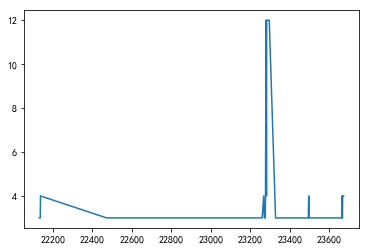

In [117]:
new_df[(new_df["转向次数"]>0) & (new_df["泵送排量"]>0)&(new_df["系统压力"]>0)&(new_df["转向次数count"]==0)]["泵车状态"].plot()

In [145]:
new_df[(new_df["转向次数"]>0) & (new_df["泵送排量"]>0)&(new_df["系统压力"]>0)&(new_df["转向次数count"]==0)]["泵车状态"]

22131    3.0
22132    3.0
22133    3.0
22134    3.0
22135    3.0
22136    3.0
22137    4.0
22471    3.0
22472    3.0
22473    3.0
22478    3.0
22479    3.0
22480    3.0
22481    3.0
22482    3.0
22483    3.0
22484    3.0
22485    3.0
22486    3.0
22490    3.0
22491    3.0
22492    3.0
22493    3.0
22494    3.0
22495    3.0
22496    3.0
22497    3.0
22498    3.0
22502    3.0
22503    3.0
        ... 
23453    3.0
23454    3.0
23484    3.0
23491    3.0
23492    3.0
23493    3.0
23494    3.0
23496    4.0
23498    3.0
23499    3.0
23500    3.0
23501    3.0
23502    3.0
23503    3.0
23652    3.0
23656    3.0
23657    3.0
23658    3.0
23659    3.0
23660    3.0
23661    3.0
23662    3.0
23663    3.0
23664    4.0
23666    3.0
23667    3.0
23668    4.0
23671    4.0
23672    4.0
23673    4.0
Name: 泵车状态, Length: 562, dtype: float64

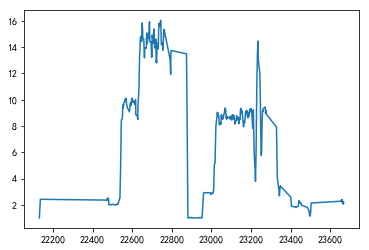

In [137]:
new_df[(new_df["转向次数"]>0) & (new_df["泵送排量"]>0)&(new_df["系统压力"]>0)&(new_df["转向次数count"]==0)&(new_df["泵车状态"] == 3)]["系统压力"].rolling(8,min_periods =1).mean().plot()

In [138]:
tmp = new_df[(new_df["转向次数"]>0) & (new_df["泵送排量"]>0)&(new_df["系统压力"]>0)&(new_df["转向次数count"]==0)&(new_df["泵车状态"] == 3)]["系统压力"].rolling(8,min_periods =1).mean()

In [139]:
tmp_diff = tmp-tmp.shift(4)

In [148]:
tmp_diff2 = tmp-tmp.shift(-140)

In [149]:
tmp_diff2.describe()

count    399.000000
mean       0.443260
std        8.215042
min      -14.025000
25%       -7.332292
50%        2.633333
75%        6.962007
max       14.820833
Name: 系统压力, dtype: float64

In [151]:
start_idx = tmp_diff2[tmp_diff2>2].index[0]    ######开始点

In [164]:
def count_series(s,t):
    df = s.reset_index()
    df["idx_diff"] = df["index"] - df["index"].shift(1)
    df["count_flag"] =df["idx_diff"].apply(lambda x: 1 if x>t else 0)
    df["count"] =df["count_flag"].cumsum()
    df = df.drop(["idx_diff","count_flag"],axis=1)
    return df

In [168]:
cut_count = count_series(tmp_diff[tmp_diff<-4],t=36)

In [174]:
cut_idx1 = int(cut_count[cut_count["count"]==0].iloc[0]["index"])    ######第一段打泵结束

In [175]:
cut_idx1

22877

In [176]:
cut_idx2 = int(cut_count[cut_count["count"]==1].iloc[0]["index"])  ######第二段打泵结束

In [177]:
cut_idx2

23247

,index,系统压力,count
0,22877,-5.343750,0
1,22878,-6.718750,0
2,22879,-6.543750,0
3,22880,-7.018750,0
4,22881,-7.400000,0
5,22886,-5.775000,0
6,23247,-4.925947,1
7,23248,-5.369697,1
8,23249,-4.771726,1
9,23331,-4.183333,2


In [154]:
pd.DataFrame(tmp_diff[tmp_diff<-5])

,系统压力
22877,-5.343750
22878,-6.718750
22879,-6.543750
22880,-7.018750
22881,-7.400000
22886,-5.775000
23248,-5.369697


In [ ]:
new_df.loc[start_idx]

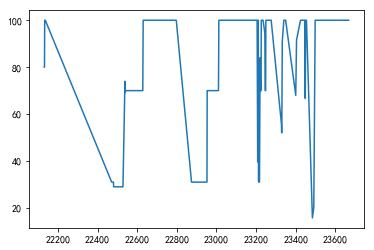

In [118]:
new_df[(new_df["转向次数"]>0) & (new_df["泵送排量"]>0)&(new_df["系统压力"]>0)&(new_df["转向次数count"]==0)&(new_df["泵车状态"] == 3)]["泵送排量"].plot()

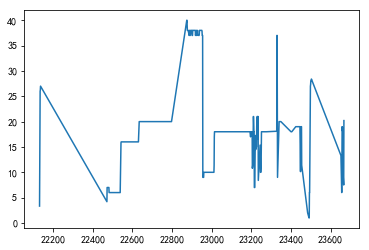

In [146]:
new_df[(new_df["转向次数"]>0) & (new_df["泵送排量"]>0)&(new_df["系统压力"]>0)&(new_df["转向次数count"]==0)&(new_df["泵车状态"] == 3)]["转向次数"].plot()

In [51]:
new_df[(new_df["泵车状态"] == 1)|(new_df["泵车状态"] == 2)|(new_df["泵车状态"] == 3)|(new_df["泵车状态"] == 4)]

,index,second_idx,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,idx,last_notna_time_diff,second
22130,22130,1.564359e+09,49.000000,80.000000,11.014563,0.000000,1279.500000,0.000000,0.000,3.0,2372.500000,12.500000,1.564359e+09
22131,22131,1.564359e+09,49.000000,80.000000,11.038835,3.333333,1346.666667,1.000000,0.000,3.0,2375.000000,1.000000,1.564359e+09
22132,22132,1.564359e+09,49.500000,80.000000,11.072816,10.000000,1447.500000,1.250000,0.000,3.0,2378.500000,1.500000,1.564359e+09
22133,22133,1.564359e+09,48.700000,100.000000,11.116505,20.400000,1557.200000,2.200000,0.000,3.0,2383.000000,1.200000,1.564359e+09
22134,22134,1.564359e+09,48.000000,100.000000,11.165049,26.000000,1655.600000,2.800000,0.000,3.0,2388.000000,1.000000,1.564359e+09
22135,22135,1.564359e+09,47.250000,100.000000,11.208738,26.250000,1690.500000,2.250000,0.000,3.0,2392.500000,1.250000,1.564359e+09
22136,22136,1.564359e+09,47.000000,100.000000,11.237864,27.000000,1713.500000,5.000000,0.000,3.0,2395.500000,0.500000,1.564359e+09
22137,22137,1.564359e+09,47.000000,100.000000,11.286408,23.750000,1702.125000,1.875000,0.000,4.0,2400.500000,1.125000,1.564359e+09
22138,22138,1.564359e+09,47.000000,100.000000,11.330097,0.000000,1185.000000,0.000000,0.000,4.0,2405.000000,1.000000,1.564359e+09
22310,22310,1.564360e+09,82.000000,0.000000,17.241830,0.000000,1359.000000,0.000000,0.000,1.0,2875.000000,25.000000,1.564360e+09


In [ ]:
####支腿臂架调试

In [50]:
new_df[(new_df["泵车状态"] == 14)|(new_df["泵车状态"] == 12)]

,index,second_idx,液压油温,泵送排量,累计油耗,转向次数,发动机转速,系统压力,累计时间,泵车状态,idx,last_notna_time_diff,second
14345,14345,1.564320e+09,38.000000,0.0,3.000000,0.0,1206.500000,0.0,0.00,14.0,675.500000,11816.250000,1.564320e+09
14346,14346,1.564320e+09,38.666667,0.0,3.000000,0.0,1205.666667,0.0,0.00,14.0,679.000000,1.666667,1.564320e+09
14347,14347,1.564320e+09,39.000000,0.0,3.000000,0.0,830.250000,0.0,0.00,14.0,682.500000,1.500000,1.564320e+09
14381,14381,1.564321e+09,41.000000,0.0,3.000000,0.0,1625.250000,0.0,0.00,12.0,720.500000,22.750000,1.564321e+09
14382,14382,1.564321e+09,41.083333,0.0,3.000000,0.0,1651.750000,0.0,0.00,12.0,724.500000,2.250000,1.564321e+09
14383,14383,1.564321e+09,41.888889,0.0,3.000000,0.0,1589.333333,0.0,0.00,12.0,728.000000,2.000000,1.564321e+09
14384,14384,1.564321e+09,42.000000,0.0,3.000000,0.0,1556.750000,0.0,0.00,12.0,731.500000,1.500000,1.564321e+09
14385,14385,1.564321e+09,42.000000,0.0,3.000000,0.0,1531.666667,0.0,0.00,12.0,735.000000,2.000000,1.564321e+09
14386,14386,1.564321e+09,42.333333,0.0,3.000000,0.0,1540.666667,0.0,0.00,12.0,738.000000,1.000000,1.564321e+09
14393,14393,1.564321e+09,44.000000,0.0,3.000000,0.0,1050.000000,0.0,0.00,12.0,740.000000,33.000000,1.564321e+09


In [53]:
####交检洗车

In [ ]:
###确定泵送完毕时间
